# DBSCAN

In [1]:
using Clustering, Gadfly, DataFrames

## Generate data

In [2]:
data = DataFrame(0.35 * randn(250, 2) .+ [1.0, 1.0]', [:x, :y])
append!(data, DataFrame(0.35 * randn(250, 2) .+ [-1.0, -1.0]', [:x, :y]))
append!(data, DataFrame(0.35 * randn(250, 2) .+ [1.0, -1.0]', [:x, :y]))

,x,y
,Float64,Float64
1,1.03625,0.699321
2,0.450105,1.02654
3,1.08074,0.654969
4,2.01554,1.22916
5,0.326612,1.4003
6,0.989262,0.621282
7,1.17015,0.568447
8,1.05611,1.29458
9,1.21636,0.824123


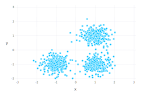

In [3]:
plot(data, x=:x, y=:y, Geom.point)

## Preprocessing

In [4]:
matrix = Matrix(Matrix(data)')

2×750 Array{Float64,2}:
 1.03625   0.450105  1.08074   2.01554  …   1.88989    0.941343   1.03883
 0.699321  1.02654   0.654969  1.22916     -0.828261  -0.483055  -0.657479

## Model

In [5]:
eps = 0.3
minpts = 9
clusters = dbscan(matrix, eps, min_neighbors=minpts, min_cluster_size=10)

3-element Array{DbscanCluster,1}:
 DbscanCluster(247, [1, 2, 3, 6, 7, 8, 9, 10, 11, 12  …  240, 241, 242, 244, 245, 246, 247, 248, 249, 250], [4, 5, 50, 55, 70, 77, 80, 85, 93, 112  …  180, 184, 190, 192, 197, 198, 200, 216, 223, 507])
 DbscanCluster(249, [251, 252, 253, 254, 255, 257, 258, 259, 260, 261  …  491, 492, 493, 494, 495, 496, 497, 498, 499, 500], [256, 265, 273, 297, 305, 332, 340, 354, 355, 361  …  391, 395, 409, 444, 453, 455, 469, 482, 485, 670])
 DbscanCluster(250, [501, 502, 503, 504, 505, 506, 508, 509, 510, 511  …  740, 741, 742, 743, 744, 745, 747, 748, 749, 750], [173, 328, 507, 514, 515, 533, 541, 555, 578, 591  …  618, 646, 654, 668, 685, 686, 710, 716, 723, 746])

## Clusters

In [6]:
clusters[1].core_indices

223-element Array{Int64,1}:
   1
   2
   3
   6
   7
   8
   9
  10
  11
  12
  13
  14
  15
   ⋮
 238
 239
 240
 241
 242
 244
 245
 246
 247
 248
 249
 250

In [7]:
data[!, :cluster] .= "0"
for i = 1:length(clusters)
    data[clusters[i].core_indices, :cluster] .= "$i"
end

## Plot

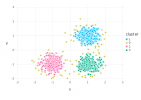

In [8]:
plot(data, x=:x, y=:y, color=:cluster, Geom.point)